In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_excel('topsis_original.xlsx')
year_list = data['Year'].unique().tolist()
data.set_index(['Country','Year'],inplace=True)
data

,,Food price inflation,Net exports Value,Food CPI,PPI Value
Country,Year,,,,
Afghanistan,2000,0.086833,-2177409,3.403726e+01,95.370896
Albania,2000,0.021930,-1844081,6.344153e+01,72.602660
Algeria,2000,0.013667,662242,5.189481e+01,54.095619
Angola,2000,1.851949,2592853,1.181357e+00,104.025401
Antigua and Barbuda,2000,0.025332,-506213,6.258868e+01,57.494706
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,1434.915544,-8451263,4.623971e+08,21.069213
Viet Nam,2019,0.040789,-4417895,1.087972e+02,65.090678
Yemen,2019,0.047224,-11841381,1.220177e+02,65.896369


In [2]:
data.describe()

,Total Energy,Fertilizer,Consumption in Agriculture,Government_Management,Law&Political Stability,Unemployment_rate,Yield(hg/ha),Gini_Index,CPI,Male/Female,Rural/Urban,Developed,socre
count,3760.000000,3760.000000,3.760000e+03,3760.000000,3760.000000,3760.000000,3.760000e+03,3760.000000,3.760000e+03,3760.000000,3760.000000,3760.000000,3760.000000
mean,101668.113043,89.534183,2.902067e+05,-0.051718,0.101138,7.773542,1.162899e+05,38.806321,7.528501e+04,1.012995,1.256660,1.021277,2.998760
std,70270.486200,84.606306,7.542262e+05,0.871681,0.920158,5.507851,1.334951e+05,7.868884,4.296352e+06,0.193750,1.377404,0.643856,0.646896
min,0.000000,0.000000,0.000000e+00,-1.900000,-5.250000,0.091000,1.153657e+04,0.000000,3.550830e-04,0.832683,0.000000,0.000000,0.000000
25%,74455.491200,21.007500,3.304464e+03,-0.700000,-0.380000,4.166250,6.111479e+04,33.710000,6.604117e+01,0.961937,0.351256,1.000000,2.692647
50%,79046.860000,81.525000,5.056800e+04,-0.095828,0.314847,6.941624,8.884063e+04,38.693705,8.560350e+01,0.987819,0.764464,1.000000,3.117257
75%,100840.578200,111.990000,2.793791e+05,0.560000,0.740000,9.119250,1.305164e+05,42.235000,1.000000e+02,1.015507,1.702506,1.000000,3.481135
max,775637.098300,509.690000,7.981591e+06,1.900000,1.670000,37.250000,1.671547e+06,73.250000,2.633984e+08,3.293863,11.126706,2.000000,3.986172


In [3]:
for column in data.columns:
    Percentile = np.percentile(data[column],[0,25,50,75,100])
    ageIQR = Percentile[3] - Percentile[1]
    UpLimit = Percentile[3]+ageIQR*1.5
    DownLimit = Percentile[1]-ageIQR*1.5
    data.loc[data[column] > UpLimit,column] = UpLimit
    data.loc[data[column] < DownLimit,column] = DownLimit
data

,,Food price inflation,Net exports Value,Food CPI,PPI Value
Country,Year,,,,
Afghanistan,2000,0.086833,-2177409.0,34.037261,95.370896
Albania,2000,0.021930,-1844081.0,63.441535,72.602660
Algeria,2000,0.013667,662242.0,51.894808,54.095619
Angola,2000,0.186264,2592853.0,2.727282,104.025401
Antigua and Barbuda,2000,0.025332,-506213.0,62.588680,57.494706
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.186264,-8451263.0,158.180658,21.069213
Viet Nam,2019,0.040789,-4417895.0,108.797175,65.090678
Yemen,2019,0.047224,-11841381.0,122.017734,65.896369


,Food price inflation,Net exports Value,Food CPI,PPI Value
count,3760.000000,3.760000e+03,3.760000e+03,3760.000000
mean,0.610225,-1.629592e+06,1.321804e+05,83.008908
std,24.251461,6.245724e+07,7.542290e+06,23.451693
min,-0.177834,-8.233195e+08,3.570000e-04,2.228191
25%,0.016984,-4.826622e+06,6.102230e+01,67.471884
50%,0.042961,-8.088200e+05,8.305200e+01,87.478941
75%,0.084696,1.535754e+06,9.988564e+01,100.036975
max,1434.915544,3.626292e+08,4.623971e+08,186.543846


<AxesSubplot:>

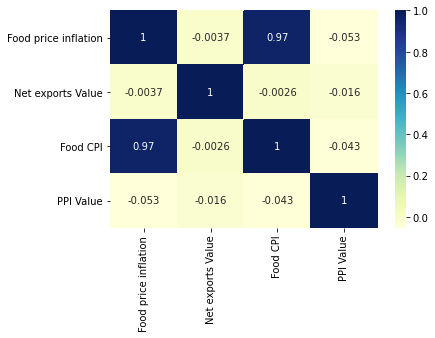

In [2]:
display(data.describe())
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')

In [5]:
def entropyWeight(data):
    P = np.array(data)
    # 计算熵值
    E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)
    # 计算权系数
    return (1 - E) / (1 - E).sum()

In [6]:
# standard
def Max(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

# mid 
def Mid(datas, x_best):
    temp_datas = datas - x_best
    M = np.max(abs(temp_datas))
    answer_datas = 1 - abs(datas - x_best) / M     
    return answer_datas

# standart min
def Min(data):
    _range = np.max(data) - np.min(data)
    return (np.max(data) - data) / _range

# Middle
def Middle(datas, x_min, x_max):
    M = max(x_min - np.min(datas), np.max(datas) - x_max)
    answer_list = []
    for i in datas:
        if(i < x_min):
            answer_list.append(1 - (x_min-i) /M)   
        elif( x_min <= i <= x_max):
            answer_list.append(1)
        else:
            answer_list.append(1 - (i - x_max)/M)
    return np.array(answer_list)

def topsis(data, weight=None):  
    
    # weight
    weight = entropyWeight(data) if weight is None else np.array(weight)
    
    # best
    Z = pd.DataFrame([(data*weight.T).min(), (data*weight.T).max()], index=['负理想解', '正理想解'])
    #Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])
    

    Result = data.copy()
    #Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    #Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 ).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 ).sum(axis=1))

    # Score
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


In [10]:
weights = pd.DataFrame()
all_data = pd.DataFrame()
for year in year_list:
    one_year_data = data.reset_index()
    one_year_data = one_year_data[one_year_data['Year']==year]
    one_year_data = one_year_data.set_index(['Country','Year'])
    
    # Standard
    one_year_data['Food price inflation'] = Mid(
        one_year_data['Food price inflation'],0.025)
    
    one_year_data['Net exports Value'] = Mid(
        one_year_data['Net exports Value'],1000000)
    
    one_year_data['Food CPI'] = Middle(
        one_year_data['Food CPI'],80,110)
    
    one_year_data['PPI Value'] = Middle(
        one_year_data['PPI Value'],80,110)
    # TOPSIS
    weight = [0.25,0.25,0.25,0.25]
    one_year_data ,z,weight= topsis(one_year_data,weight=weight)
    
    
    display(one_year_data)
    display(z)
    print('Weight:',weight)
    weight = pd.DataFrame(weight).T
    weight.index = [year]
    weights = pd.concat([weights,weight],axis=0)
    all_data = pd.concat([all_data,one_year_data],axis=0)
all_data['Score'] = all_data['综合得分指数']
all_data['Rank'] = all_data['排序']
all_data.drop(['正理想解','负理想解','综合得分指数','排序'],axis=1,inplace=True)
weights.columns = data.columns
all_data

,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2000,0.616575,0.793275,0.405188,1.000000,1.008829,1.474322,0.593730,81.0
Albania,2000,0.980963,0.814961,0.785714,0.879475,1.240389,1.737030,0.583401,140.0
Algeria,2000,0.929725,0.978025,0.636286,0.577938,1.118514,1.599936,0.588547,108.0
Angola,2000,0.000000,0.896367,0.000000,1.000000,1.052105,1.342935,0.560715,179.0
Antigua and Barbuda,2000,0.997944,0.902004,0.774677,0.633319,1.186946,1.676521,0.585486,125.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2000,0.402147,0.420947,0.000000,0.000000,0.421784,0.582167,0.579876,155.0
Viet Nam,2000,0.688080,0.761956,0.308801,0.199728,0.679393,1.090541,0.616148,14.0
Yemen,2000,0.389137,0.826855,0.227121,0.110115,0.611417,0.948064,0.607936,32.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249779,0.248652,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2001,0.616575,0.753432,0.443436,1.000000,0.994100,1.464398,0.595647,72.0
Albania,2001,0.980963,0.796693,0.803719,0.946775,1.275134,1.771823,0.581506,145.0
Algeria,2001,0.929725,0.744840,0.645387,0.541820,0.974172,1.459201,0.599662,57.0
Angola,2001,0.000000,0.988693,0.006865,1.000000,1.109126,1.406258,0.559063,185.0
Antigua and Barbuda,2001,0.997944,0.906765,0.795175,0.633319,1.198197,1.688642,0.584945,123.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2001,0.402147,0.997252,0.000000,0.000000,0.840890,1.075283,0.561162,183.0
Viet Nam,2001,0.688080,0.834230,0.300068,0.176869,0.735985,1.136097,0.606863,31.0
Yemen,2001,0.389137,0.773100,0.259681,0.142461,0.552321,0.914790,0.623531,9.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249779,0.249669,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2002,0.616577,0.696374,0.485006,1.000000,0.975948,1.449253,0.597581,61.0
Albania,2002,0.887015,0.775293,0.840040,0.967776,1.243612,1.740727,0.583287,125.0
Algeria,2002,0.972623,0.452503,0.665347,0.594412,0.924841,1.395266,0.601380,43.0
Angola,2002,0.000000,0.991382,0.056715,1.000000,1.101405,1.409274,0.561312,184.0
Antigua and Barbuda,2002,0.934222,0.905839,0.807095,0.658200,1.173473,1.666716,0.586833,109.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2002,0.000000,0.544904,0.000000,0.000000,0.524182,0.544904,0.509691,188.0
Viet Nam,2002,0.987442,0.934849,0.307760,0.178368,1.011523,1.405531,0.581506,133.0
Yemen,2002,0.262256,0.684736,0.301953,0.175401,0.445186,0.812147,0.645928,5.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249552,0.249116,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2003,0.616580,0.682224,0.530184,1.000000,0.981447,1.458319,0.597729,62.0
Albania,2003,0.844279,0.741118,0.883820,0.994498,1.245689,1.741330,0.582966,128.0
Algeria,2003,0.954345,0.729517,0.688049,0.671218,1.047293,1.538478,0.594978,75.0
Angola,2003,0.000000,0.931839,0.156870,1.000000,1.048484,1.375839,0.567515,182.0
Antigua and Barbuda,2003,0.684715,0.902570,0.785320,0.658200,1.034146,1.527554,0.596305,72.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2003,0.000000,0.607511,0.000000,0.000000,0.561760,0.607511,0.519564,188.0
Viet Nam,2003,0.997838,0.909365,0.316430,0.192224,1.001779,1.399894,0.582883,129.0
Yemen,2003,0.404092,0.643127,0.342815,0.222549,0.434064,0.862527,0.665227,3.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.00000,0.000000,0.00,0.00
正理想解,0.24946,0.249259,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2004,0.616582,0.670963,0.579286,1.000000,0.992859,1.471712,0.597147,64.0
Albania,2004,0.956419,0.702010,0.900209,0.917001,1.255437,1.748949,0.582132,138.0
Algeria,2004,0.861887,0.639795,0.722256,0.753011,1.003405,1.496952,0.598695,59.0
Angola,2004,0.000000,0.883351,0.251868,1.000000,1.013330,1.357846,0.572647,177.0
Antigua and Barbuda,2004,0.896702,0.901509,0.819439,0.658200,1.157157,1.649697,0.587739,108.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2004,0.000000,0.657499,0.000000,0.000000,0.594597,0.657499,0.525119,188.0
Viet Nam,2004,0.377820,0.866607,0.360411,0.281530,0.642143,1.050196,0.620559,16.0
Yemen,2004,0.473529,0.667636,0.384254,0.295235,0.496938,0.951200,0.656844,3.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.247392,0.248424,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2005,0.617725,0.586379,0.632539,1.000000,0.978761,1.457920,0.598322,57.0
Albania,2005,0.825419,0.682411,0.897259,0.910199,1.172168,1.667494,0.587216,107.0
Algeria,2005,0.650047,0.535397,0.698084,0.743120,0.828355,1.322407,0.614855,18.0
Angola,2005,0.000000,0.463693,0.318686,1.000000,0.821825,1.147420,0.582670,131.0
Antigua and Barbuda,2005,0.982520,0.883678,0.838361,0.658200,1.205159,1.697736,0.584842,117.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2005,0.000000,0.344229,0.000000,0.000000,0.443000,0.344229,0.437267,188.0
Viet Nam,2005,0.458003,0.799691,0.404620,0.362890,0.618824,1.069897,0.633555,8.0
Yemen,2005,0.438587,0.638469,0.432872,0.370507,0.484861,0.961590,0.664792,3.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249511,0.249398,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2006,0.764029,0.550906,0.674349,1.000000,1.047732,1.530355,0.593601,79.0
Albania,2006,0.867742,0.641426,0.900677,0.899237,1.174815,1.668608,0.586831,107.0
Algeria,2006,0.888020,0.344229,0.729002,0.779953,0.962665,1.430680,0.597774,60.0
Angola,2006,0.083102,0.344229,0.379371,1.000000,0.784762,1.126642,0.589432,92.0
Antigua and Barbuda,2006,0.947904,0.884139,0.852804,0.658200,1.191535,1.685445,0.585838,112.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2006,0.000000,0.344229,0.000000,0.000000,0.442942,0.344229,0.437299,188.0
Viet Nam,2006,0.617804,0.885690,0.442658,0.344812,0.765373,1.216951,0.613901,21.0
Yemen,2006,0.783664,0.612820,0.460735,0.445874,0.706845,1.183537,0.626084,9.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249627,0.249974,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2007,0.394413,0.543585,0.761883,1.000000,0.965323,1.425311,0.596206,45.0
Albania,2007,0.868030,0.550671,0.904166,0.888026,1.143618,1.631815,0.587950,80.0
Algeria,2007,0.761300,0.625524,0.777593,0.863484,1.028426,1.523520,0.597003,42.0
Angola,2007,0.275294,0.344229,0.438199,1.000000,0.779434,1.177412,0.601689,35.0
Antigua and Barbuda,2007,0.908411,0.869205,0.888199,0.802039,1.236812,1.735768,0.583927,95.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007,0.000000,0.998540,0.000000,0.000000,0.865014,0.998540,0.535826,188.0
Viet Nam,2007,0.460456,0.542890,0.496395,0.375684,0.454850,0.945672,0.675228,3.0
Yemen,2007,0.343579,0.242366,0.525860,0.534097,0.407014,0.859405,0.678610,2.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249782,0.249635,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2008,0.000000,0.367356,1.000000,0.959749,1.068798,1.433900,0.572942,161.0
Albania,2008,0.831710,0.445745,0.952404,0.913524,1.145089,1.622354,0.586228,48.0
Algeria,2008,0.684436,0.912967,0.836462,1.000000,1.239299,1.732522,0.582983,76.0
Angola,2008,0.006900,0.344229,0.519847,1.000000,0.838507,1.178466,0.584275,64.0
Antigua and Barbuda,2008,0.794056,0.866076,0.940920,0.802039,1.207855,1.705640,0.585428,50.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2008,0.000000,0.957841,0.000000,0.000000,0.830014,0.957841,0.535749,188.0
Viet Nam,2008,0.000000,0.642084,0.688529,0.548471,0.705479,1.089570,0.606986,10.0
Yemen,2008,0.000000,0.000000,0.664117,0.738897,0.731418,0.993489,0.575967,144.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249399,0.249517,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2009,0.320468,0.513984,0.937277,1.000000,1.053688,1.498455,0.587136,40.0
Albania,2009,0.849049,0.495600,1.000000,1.000000,1.243187,1.722354,0.580789,92.0
Algeria,2009,0.645520,0.000000,0.907812,1.000000,1.101812,1.496937,0.576022,143.0
Angola,2009,0.028950,0.556439,0.616661,1.000000,0.916638,1.300282,0.586526,44.0
Antigua and Barbuda,2009,0.712676,0.879578,1.000000,0.808230,1.219306,1.713126,0.584200,60.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2009,0.000000,0.000000,0.000000,0.000000,0.499070,0.000000,0.000000,188.0
Viet Nam,2009,0.595029,0.557032,0.745977,0.613379,0.769767,1.263748,0.621460,6.0
Yemen,2009,0.705505,0.018147,0.710730,0.961453,0.989763,1.388379,0.583808,63.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249408,0.248731,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2010,0.850841,0.314617,0.933078,1.000000,1.181514,1.641204,0.581427,57.0
Albania,2010,0.834197,0.522150,1.000000,1.000000,1.242683,1.722941,0.580971,60.0
Algeria,2010,0.886055,0.170416,0.948024,1.000000,1.208647,1.647083,0.576764,125.0
Angola,2010,0.074394,0.344229,0.730059,1.000000,0.912929,1.287251,0.585066,35.0
Antigua and Barbuda,2010,0.725559,0.882394,1.000000,0.799000,1.223768,1.715651,0.583670,42.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2010,0.000000,0.689094,0.000000,0.000000,0.620223,0.689094,0.526300,188.0
Viet Nam,2010,0.489361,0.911217,0.829902,0.719981,1.029189,1.508940,0.594509,12.0
Yemen,2010,0.535877,0.109160,0.783925,0.960117,0.943330,1.354786,0.589520,20.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249197,0.244597,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2011,0.482661,0.085377,1.000000,0.971142,1.078621,1.477622,0.578044,106.0
Albania,2011,0.882872,0.469583,1.000000,1.000000,1.254933,1.732042,0.579865,73.0
Algeria,2011,0.893180,0.000000,0.991564,1.000000,1.260259,1.667624,0.569566,175.0
Angola,2011,0.228116,0.344229,0.847953,1.000000,0.964203,1.374611,0.587738,20.0
Antigua and Barbuda,2011,0.866218,0.873740,1.000000,0.816312,1.286215,1.783290,0.580970,65.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2011,0.000000,0.392785,0.000000,0.000000,0.456253,0.392785,0.462623,188.0
Viet Nam,2011,0.000000,0.768122,1.000000,1.000000,1.207228,1.609351,0.571385,167.0
Yemen,2011,0.225878,0.095971,0.913386,1.000000,1.013111,1.376411,0.576019,133.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249664,0.248441,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2012,0.860079,0.000000,1.000000,0.936797,1.211665,1.617815,0.571771,168.0
Albania,2012,0.993784,0.520854,1.000000,1.000000,1.324045,1.805241,0.576886,107.0
Algeria,2012,0.397256,0.000000,1.000000,1.000000,1.099183,1.468949,0.571991,167.0
Angola,2012,0.363099,0.344229,0.970317,0.879215,0.967935,1.401738,0.591532,7.0
Antigua and Barbuda,2012,0.896637,0.870204,1.000000,0.811302,1.297422,1.794275,0.580353,52.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2012,0.000000,0.623972,0.000000,0.000000,0.573429,0.623972,0.521105,188.0
Viet Nam,2012,0.634790,0.344229,1.000000,1.000000,1.132491,1.587908,0.583704,24.0
Yemen,2012,0.506288,0.000000,1.000000,1.000000,1.119042,1.502108,0.573072,152.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249754,0.247882,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2013,0.685631,0.000000,1.0,1.000000,1.173473,1.571652,0.572525,161.0
Albania,2013,0.892426,0.545366,1.0,0.806742,1.172365,1.656708,0.585601,9.0
Algeria,2013,0.952089,0.000000,1.0,1.000000,1.296377,1.704838,0.568049,180.0
Angola,2013,0.513204,0.344229,1.0,1.000000,1.097220,1.543331,0.584473,15.0
Antigua and Barbuda,2013,0.996995,0.869431,1.0,0.654881,1.292852,1.782913,0.579665,52.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2013,0.000000,0.000000,0.0,0.000000,0.498732,0.000000,0.000000,188.0
Viet Nam,2013,0.988101,0.000000,1.0,1.000000,1.316249,1.725208,0.567231,184.0
Yemen,2013,0.448820,0.000000,1.0,1.000000,1.107446,1.483725,0.572608,160.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249249,0.248211,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2014,0.671597,0.000000,1.0,1.000000,1.167471,1.565580,0.572832,152.0
Albania,2014,0.981213,0.600119,1.0,1.000000,1.336424,1.822889,0.576989,105.0
Algeria,2014,0.912743,0.000000,1.0,1.000000,1.274588,1.683181,0.569071,181.0
Angola,2014,0.718835,0.599742,1.0,1.000000,1.212758,1.696000,0.583067,16.0
Antigua and Barbuda,2014,0.906156,0.869101,1.0,0.576114,1.220270,1.705392,0.582908,18.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2014,0.000000,0.000000,0.0,1.000000,0.864559,1.000000,0.536320,188.0
Viet Nam,2014,0.906496,0.344229,1.0,1.000000,1.251436,1.714710,0.578094,85.0
Yemen,2014,0.753060,0.000000,1.0,1.000000,1.199312,1.602217,0.571908,161.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.00000,0.000000,0.00,0.00
正理想解,0.24979,0.245088,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2015,0.793703,0.000000,1,1.000000,1.217561,1.480697,0.548760,159.0
Albania,2015,0.889416,0.626932,1,1.000000,1.295414,1.657289,0.561278,31.0
Algeria,2015,0.859546,0.000000,1,1.000000,1.248375,1.517010,0.548571,167.0
Angola,2015,0.615990,0.830539,1,1.000000,1.264444,1.622264,0.561977,14.0
Antigua and Barbuda,2015,0.998407,0.871855,1,0.907688,1.394704,1.772948,0.559704,82.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2015,0.000000,0.000000,1,0.000000,0.865280,0.750000,0.464316,188.0
Viet Nam,2015,0.936915,0.436225,1,1.000000,1.277850,1.621913,0.559326,100.0
Yemen,2015,0.919483,0.000000,1,1.000000,1.278730,1.551757,0.548230,175.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.25,0.00
正理想解,0.249602,0.247807,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2016,0.802497,0.000000,1.000000,1.000000,1.221726,1.626039,0.570988,169.0
Albania,2016,0.951980,0.602717,1.000000,1.000000,1.320099,1.808185,0.578012,86.0
Algeria,2016,0.943656,0.000000,1.000000,1.000000,1.291722,1.700143,0.568255,182.0
Angola,2016,0.000000,0.830216,0.510686,0.969456,0.992594,1.374738,0.580712,45.0
Antigua and Barbuda,2016,0.836041,0.877475,1.000000,0.340165,1.143906,1.607682,0.584274,14.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2016,0.000000,0.147872,0.000000,0.000000,0.444729,0.147872,0.249530,188.0
Viet Nam,2016,0.991516,0.344229,1.000000,0.984372,1.288704,1.752309,0.576225,119.0
Yemen,2016,0.813846,0.000000,1.000000,1.000000,1.226901,1.631669,0.570799,171.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249906,0.249513,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2017,0.723587,0.115244,0.937444,1.000000,1.130186,1.554239,0.578984,82.0
Albania,2017,0.912326,0.824658,1.000000,1.000000,1.376568,1.874140,0.576533,127.0
Algeria,2017,0.842463,0.000000,1.000000,1.000000,1.240210,1.646130,0.570317,170.0
Angola,2017,0.000000,0.043706,0.000000,0.618026,0.550119,0.619570,0.529688,186.0
Antigua and Barbuda,2017,0.961216,0.891844,1.000000,0.340165,1.220480,1.683756,0.579759,72.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2017,0.000000,0.000000,0.000000,0.000000,0.499555,0.000000,0.000000,188.0
Viet Nam,2017,0.778462,0.409569,1.000000,0.943082,1.160993,1.631917,0.584307,43.0
Yemen,2017,0.831643,0.059396,0.978931,1.000000,1.211688,1.628945,0.573444,161.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.00000,0.00,0.00
正理想解,0.249969,0.24914,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2018,0.780115,0.119586,0.963269,1.000000,1.169994,1.597112,0.577178,104.0
Albania,2018,0.988944,0.806551,0.995879,1.000000,1.405921,1.902711,0.575075,134.0
Algeria,2018,0.944226,0.000000,0.953231,1.000000,1.265184,1.673383,0.569455,162.0
Angola,2018,0.167910,0.147332,0.000000,0.877144,0.687554,0.905142,0.568308,169.0
Antigua and Barbuda,2018,0.945805,0.888758,1.000000,0.340165,1.210396,1.673365,0.580272,56.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2018,0.000000,0.000000,0.000000,0.000000,0.499116,0.000000,0.000000,188.0
Viet Nam,2018,0.953202,0.825430,1.000000,0.921573,1.356900,1.854515,0.577476,99.0
Yemen,2018,0.847676,0.265729,0.864750,0.760675,0.998140,1.454505,0.593035,12.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249952,0.248277,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2019,0.919711,0.389013,0.875717,1.000000,1.193117,1.662552,0.582194,45.0
Albania,2019,0.973934,0.706339,0.929090,1.000000,1.326358,1.819525,0.578383,86.0
Algeria,2019,0.812880,0.000000,0.966212,1.000000,1.206019,1.610695,0.571835,149.0
Angola,2019,0.130995,0.212775,0.000000,1.000000,0.800125,1.030744,0.562981,173.0
Antigua and Barbuda,2019,0.976336,0.889891,1.000000,1.000000,1.437400,1.935236,0.573805,139.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.000000,0.385091,0.000000,0.000000,0.453882,0.385091,0.459003,188.0
Viet Nam,2019,0.902089,0.647506,1.000000,0.747003,1.181353,1.670641,0.585780,26.0
Yemen,2019,0.862192,0.164527,0.750569,0.760675,0.945503,1.382904,0.593927,13.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00,0.00
正理想解,0.249243,0.247663,0.25,0.25


Weight: [0.25 0.25 0.25 0.25]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,Score,Rank
Country,Year,,,,,,
Afghanistan,2000,0.616575,0.793275,0.405188,1.000000,0.593730,81.0
Albania,2000,0.980963,0.814961,0.785714,0.879475,0.583401,140.0
Algeria,2000,0.929725,0.978025,0.636286,0.577938,0.588547,108.0
Angola,2000,0.000000,0.896367,0.000000,1.000000,0.560715,179.0
Antigua and Barbuda,2000,0.997944,0.902004,0.774677,0.633319,0.585486,125.0
...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.000000,0.385091,0.000000,0.000000,0.459003,188.0
Viet Nam,2019,0.902089,0.647506,1.000000,0.747003,0.585780,26.0
Yemen,2019,0.862192,0.164527,0.750569,0.760675,0.593927,13.0


In [11]:
weights

,Food price inflation,Net exports Value,Food CPI,PPI Value
2000,0.25,0.25,0.25,0.25
2001,0.25,0.25,0.25,0.25
2002,0.25,0.25,0.25,0.25
2003,0.25,0.25,0.25,0.25
2004,0.25,0.25,0.25,0.25
2005,0.25,0.25,0.25,0.25
2006,0.25,0.25,0.25,0.25
2007,0.25,0.25,0.25,0.25
2008,0.25,0.25,0.25,0.25
2009,0.25,0.25,0.25,0.25


In [12]:
weights.to_csv('weight.csv')
all_data.to_csv('topsis_original.csv')